Exercise 1
Part 1 (Cluster)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [3]:
def gen_linearly_sep_pts():

    #no of points
    n_points=100

    #generaring the clusters
    cluster1 = np.random.randn(n_points,2)
    cluster2 = np.random.randn(n_points,2)

    #moving the mean of the clusters
    cluster1 += np.array([-2,-2])
    cluster2 += np.array([2, 2])

    #assigning labels to the cluster
    label_1 = np.array([[-1]] * 100) #converted a python array of 100 times -1 to numpy array
    label_2 = np.array([[1]] * 100)

    #combining points and labels separately
    combo_label = np.append(label_1, label_2, axis = 0) #append along rows
    combo_cluster = np.append(cluster1, cluster2, axis = 0)

    #combining points and labels together and shuffling
    combo = np.append(combo_cluster,combo_label, axis = 1) #append along column
    np.random.shuffle(combo)

    #splitting points back into separate arrays
    shuffle_points = combo[:,:2] #return only the first 2 columns (x,y)
    shuffle_labels = combo[:,2:] #return only the third column (label)

    return shuffle_points, shuffle_labels



Part 2 (XOR)

In [4]:
def gen_xor_dataset():

    #given 4 points
    points = np.array([[0,0],[0,1],[1,0],[1,1]])

    #assigning labels to points by applying xor 
    labels = np.logical_xor(points[:,0],points[:,1]).astype(int)

    #converting [0,1] to [-1,1]
    labels[labels==0] = -1

    #changing shape of labels to [N,1]
    labels = labels.reshape(-1,1) # "-1" makes numpy infer the number of rows

    return points, labels


Part 3 (Visualization)

In [5]:
def visualize_clusters(points, labels):
    
    #convert labels to 1-D 
    cluster1 = points[labels.flatten() == -1]
    cluster2 = points[labels.flatten() == 1]

    #plot cluster of labels 1 and -1 separately with distinct colors
    plt.plot(cluster1[:,0], cluster1[:,1], 'o', color = "red", label = "Class -1")
    plt.plot(cluster2[:,0], cluster2[:,1], 'o', color = "blue", label = "Class 1")

    #plot with legend and grid lines
    plt.title("Linearly Separable Clusters")
    plt.legend()
    plt.grid(True)
    plt.show()

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[-1]
 [ 1]
 [ 1]
 [-1]]


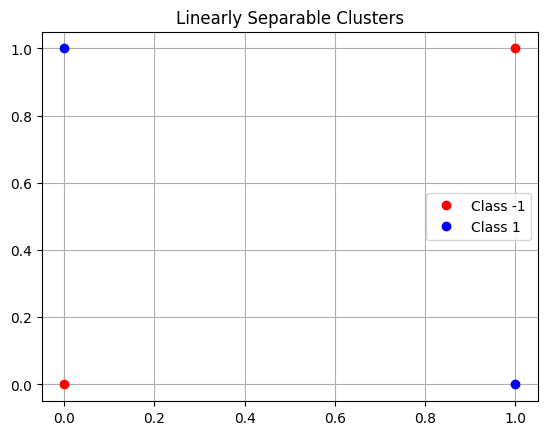

In [6]:
pts,lbls = gen_xor_dataset()
print(pts)
print(lbls)
visualize_clusters(pts, lbls)

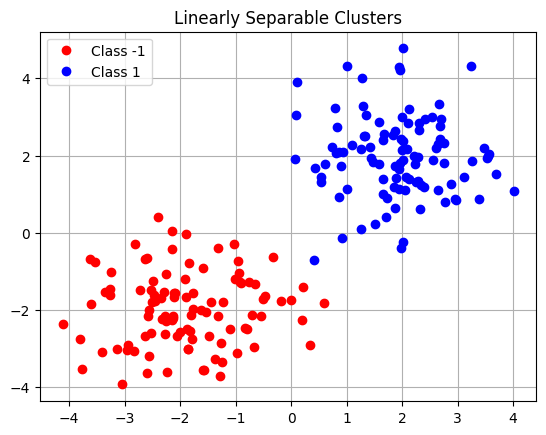

In [7]:
points, labels = gen_linearly_sep_pts()
visualize_clusters(points, labels)


1. Use ` sklearn.svm.LinearSVC ` to find a linear decision boundary for your classification.
    Initialise it with the default parameters and use the `fit()` method to optimise the linear
    model. 
 



In [8]:
def train_linear_svc(points, labels):
    # Initialize
    model = LinearSVC()

    # .fit for the data
    model.fit(points, labels.ravel())
    
    return model


In [9]:
# Training the model for both
linear_svc_model_linearly_sep = train_linear_svc(points, labels)
linear_svc_model_xor = train_linear_svc(pts, lbls)

2. Write a function to visualise the `decision boundary` predicted by your model. 



In [10]:
def visualize_decision_boundary(model, points, labels):
    # mesh grid for plotting the decision boundary
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot  decision boundary and  points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot clusters with their actual labels
    cluster1 = points[labels.flatten() == -1]
    cluster2 = points[labels.flatten() == 1]
    
    plt.plot(cluster1[:, 0], cluster1[:, 1], 'o', color='red', label='Class -1')
    plt.plot(cluster2[:, 0], cluster2[:, 1], 'o', color='blue', label='Class 1')
    
    plt.title("Decision Boundary Visualization")
    plt.legend()
    plt.grid(True)
    plt.show()

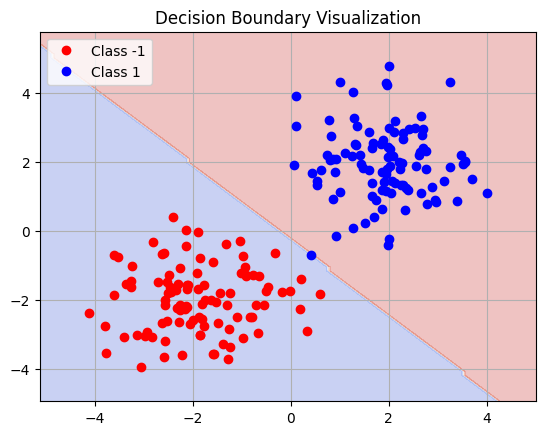

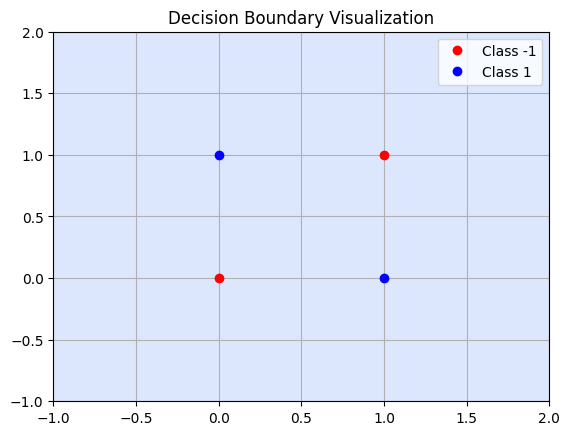

In [11]:
visualize_decision_boundary(linear_svc_model_linearly_sep, points, labels)
visualize_decision_boundary(linear_svc_model_xor, pts, lbls)

3.  Optimise the model and visualise the `decision boundary` for both your datasets.

In [12]:
def train_opt_linear_svc(points, labels, C=0.1):

    # same as task 2 but with a regularization parameter C
    model = LinearSVC(C=C, max_iter=10000)
    model.fit(points, labels.ravel())
    return model

In [13]:
# Train optimized models for both
olsvc_linearly_sep = train_opt_linear_svc(points, labels, C=0.01)
olsvc_model_xor = train_opt_linear_svc(pts, lbls, C=0.01)


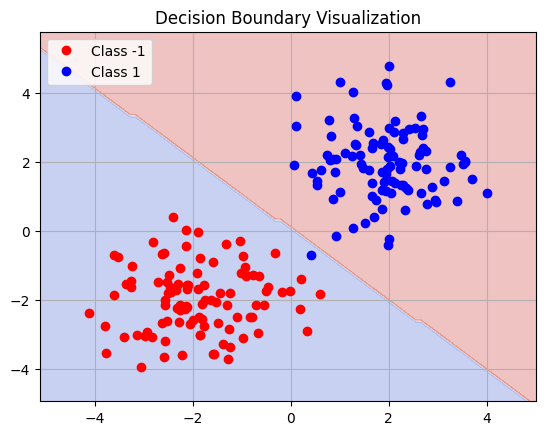

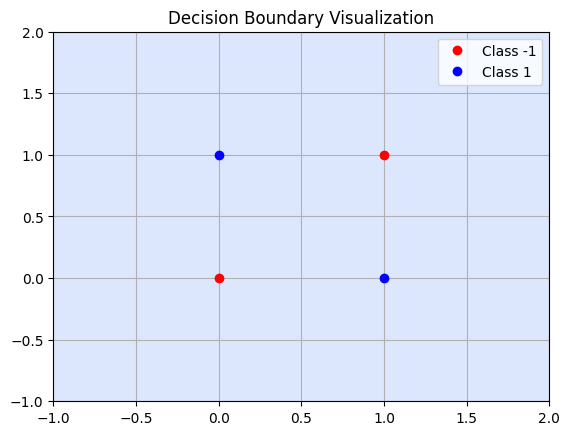

In [14]:
# Visualization 
visualize_decision_boundary(olsvc_linearly_sep, points, labels)
visualize_decision_boundary(olsvc_model_xor, pts, lbls)



1. why the model worked in one case and not the other ?

In the first case the data points are linearly separable, which means that there exists a straight line (or hyperplane in higher dimensions) that can perfectly separate points belonging to Class -1 from those belonging to Class 1. Linear classifiers, like LinearSVC, are designed to find such a decision boundary if it exists.

In the second case the points follow an XOR pattern, which is inherently non-linearly separable. XOR data has a specific structure: points belonging to the same class are positioned in opposite corners (e.g., Class -1 in the top right and bottom left, and Class 1 in the top left and bottom right). There's no single straight line that can separate these two classes without making errors, because each class "wraps around" the other in a way that can only be separated by a non-linear boundary.

A linear model, like the one trained with LinearSVC, can only produce a straight decision boundary. We can observe a small region marked differently, where it tries to balance between the classes.

2. is this decision boundary unique?

No, the decision boundary can vary according to regularization parameter "C", noise, alg implementation and optimisation

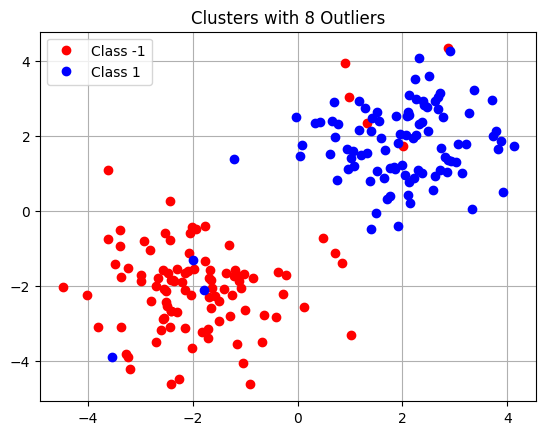

In [15]:
#3 Create some outliers by flipping the class of randomly selected 8 points in the first dataset. What was the change in the predicted decision boundary ?





# Add random outliers by flipping exactly n_outliers labels
def add_outliers(points, labels, n_outliers=8):
    # Select n_outliers random indices
    indices = np.random.choice(len(labels), n_outliers, replace=False)
    
    # Flip the labels of the selected points
    labels[indices] = -labels[indices]  # Changes -1 to 1 and 1 to -1

    
    return points, labels

# Vis
def visualize_clusters(points, labels):
    
    cluster1 = points[labels.flatten() == -1]
    cluster2 = points[labels.flatten() == 1]

    # Plot clusters with distinct colors
    plt.plot(cluster1[:, 0], cluster1[:, 1], 'o', color="red", label="Class -1")
    plt.plot(cluster2[:, 0], cluster2[:, 1], 'o', color="blue", label="Class 1")

    plt.title("Clusters with 8 Outliers")
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate linearly separable data
points, labels = gen_linearly_sep_pts()

# Flip labels for 8 points
points_with_outliers, labels_with_outliers = add_outliers(points.copy(), labels.copy(), n_outliers=8)

# Vis
visualize_clusters(points_with_outliers, labels_with_outliers)



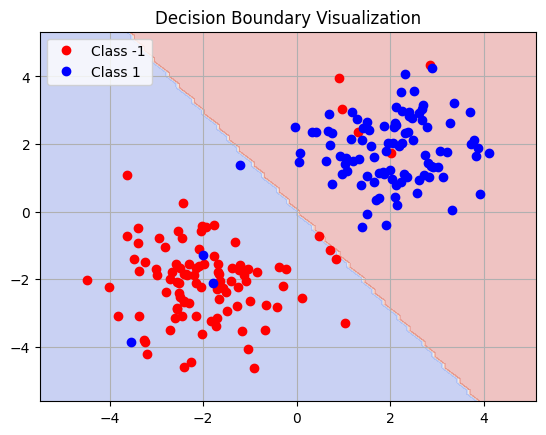

In [16]:
# Train SVM on the modified dataset with outliers
svc_model_outliers = LinearSVC(C=0.1, max_iter=10000)
svc_model_outliers.fit(points_with_outliers, labels_with_outliers.ravel())

# Visualize the decision boundary with flipped labels
visualize_decision_boundary(svc_model_outliers, points_with_outliers, labels_with_outliers)


The addition of outliers caused the decision boundary to tilt slightly to the left. This shift happens because the SVM model adjusts to account for the new points in class -1, which pull the boundary toward them. By doing so, the boundary tries to cover more of the red points while still maintaining a separation from the blue cluster. This small change illustrates how sensitive SVM can be to outliers, as it balances maximizing the margin with correctly classifying the data. Even a few outliers can impact the boundary, subtly altering the model’s separation between the two classes.